In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metalfurnace/Test1.csv
/kaggle/input/metalfurnace/submision.csv
/kaggle/input/metalfurnace/Train2.csv


# #Import Libraries

In [2]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# #read data

In [3]:

data=pd.read_csv('/kaggle/input/metalfurnace/Train2.csv')


# #print 5 frist data

In [4]:

print(data.head())

         f0       f1        f2        f3        f4        f5        f6  \
0  1.848564 -0.26425 -0.461423  0.409400  1.305455  2.329398  0.370965   
1 -0.825098 -0.26425  3.032397 -2.442599  1.305455 -0.276144  0.370965   
2  1.848564 -0.26425 -0.461423  0.409400  1.305455  2.329398  0.370965   
3  0.511733 -0.26425 -0.461423  0.409400 -0.525726 -0.276144  0.370965   
4 -0.825098 -0.26425 -0.461423  0.409400 -0.525726 -0.276144  0.370965   

         f7        f8   f9  ...       f19       f20       f21       f22  \
0  0.090167  0.107958  0.0  ...  0.085505  0.233285 -1.080663  0.443257   
1  0.090167  0.107958  0.0  ...  0.085505  0.233285 -1.080663 -0.232546   
2  0.090167  0.107958  0.0  ...  0.085505  0.233285  0.925358  1.459782   
3  0.090167  0.107958  0.0  ...  0.085505  0.233285  0.925358 -0.008030   
4  0.090167  0.107958  0.0  ...  0.085505  0.233285  0.925358 -0.573268   

        f23       f24       f25       f26       f27  grade  
0 -0.406121 -0.687687  0.271886  3.727218  

# #print data columns

In [5]:

x=1
for col in data.columns:
    print(f'column {x} is : ',col)
    x+=1

column 1 is :  f0
column 2 is :  f1
column 3 is :  f2
column 4 is :  f3
column 5 is :  f4
column 6 is :  f5
column 7 is :  f6
column 8 is :  f7
column 9 is :  f8
column 10 is :  f9
column 11 is :  f10
column 12 is :  f11
column 13 is :  f12
column 14 is :  f13
column 15 is :  f14
column 16 is :  f15
column 17 is :  f16
column 18 is :  f17
column 19 is :  f18
column 20 is :  f19
column 21 is :  f20
column 22 is :  f21
column 23 is :  f22
column 24 is :  f23
column 25 is :  f24
column 26 is :  f25
column 27 is :  f26
column 28 is :  f27
column 29 is :  grade


# #data corr

             f0        f1        f2        f3        f4        f5        f6  \
f0     1.000000 -0.087557 -0.291796  0.179960 -0.296899  0.184263  0.306082   
f1    -0.087557  1.000000 -0.121931  0.090127  0.339716 -0.072971  0.098027   
f2    -0.291796 -0.121931  1.000000 -0.803749  0.394771 -0.127419  0.158973   
f3     0.179960  0.090127 -0.803749  1.000000 -0.526030  0.113053 -0.137766   
f4    -0.296899  0.339716  0.394771 -0.526030  1.000000  0.360494 -0.103868   
f5     0.184263 -0.072971 -0.127419  0.113053  0.360494  1.000000  0.102440   
f6     0.306082  0.098027  0.158973 -0.137766 -0.103868  0.102440  1.000000   
f7    -0.166679  0.023827  0.041605 -0.036914 -0.117709 -0.369184 -0.033449   
f8    -0.151461  0.028528  0.049814 -0.044198  0.056757  0.029812 -0.040049   
f9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f10    0.118728  0.097280  0.096463 -0.000780  0.087302  0.084760 -0.146855   
f11    0.073885 -0.263661 -0.049093  0.069306 -0.225

<AxesSubplot:>

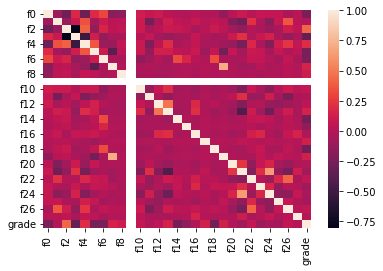

In [6]:

print(data.corr()) 
sns.heatmap(data.corr())

# #data info

In [7]:

print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      620 non-null    float64
 1   f1      620 non-null    float64
 2   f2      620 non-null    float64
 3   f3      620 non-null    float64
 4   f4      620 non-null    float64
 5   f5      620 non-null    float64
 6   f6      620 non-null    float64
 7   f7      620 non-null    float64
 8   f8      620 non-null    float64
 9   f9      620 non-null    float64
 10  f10     620 non-null    float64
 11  f11     620 non-null    float64
 12  f12     620 non-null    float64
 13  f13     620 non-null    float64
 14  f14     620 non-null    float64
 15  f15     620 non-null    float64
 16  f16     620 non-null    float64
 17  f17     620 non-null    float64
 18  f18     620 non-null    float64
 19  f19     620 non-null    float64
 20  f20     620 non-null    float64
 21  f21     620 non-null    float64
 22  f2

# #show data contain null data

In [8]:

print(data.isnull().sum())

f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
grade    0
dtype: int64


# #show data contain dublicate data

In [9]:

print(data.duplicated().sum())

3


# #data describe

In [10]:

print(data.describe())

                 f0          f1            f2            f3            f4  \
count  6.200000e+02  620.000000  6.200000e+02  6.200000e+02  6.200000e+02   
mean   2.865092e-17    0.000000 -8.595275e-18  9.741312e-17 -2.721837e-17   
std    1.000807e+00    1.000807  1.000807e+00  1.000807e+00  1.000807e+00   
min   -8.250977e-01   -0.264250 -4.614228e-01 -2.442599e+00 -2.356907e+00   
25%   -8.250977e-01   -0.264250 -4.614228e-01  4.093999e-01 -5.257260e-01   
50%   -3.794874e-01   -0.264250 -4.614228e-01  4.093999e-01 -5.257260e-01   
75%    5.117331e-01   -0.264250 -4.614228e-01  4.093999e-01  1.305455e+00   
max    2.294174e+00    4.920404  3.032397e+00  4.093999e-01  1.305455e+00   

                 f5            f6            f7            f8     f9  ...  \
count  6.200000e+02  6.200000e+02  6.200000e+02  6.200000e+02  620.0  ...   
mean   5.730183e-18 -6.303202e-17 -1.217664e-16 -1.160362e-16    0.0  ...   
std    1.000807e+00  1.000807e+00  1.000807e+00  1.000807e+00    0.0  ...  

# #show input X and output y

In [11]:

col=data.shape[1]
X=data.iloc[:,0:col-1]
y=data.iloc[:,col-1:col]
print(col)
print(X.shape)
print(y.shape)

29
(620, 28)
(620, 1)


# #data spliting

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (415, 28)
X_test shape is  (205, 28)
y_train shape is  (415, 1)
y_test shape is  (205, 1)


# #Applying LogisticRegression Model 

In [13]:

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1, random_state=33, solver='sag')

# #Calculating Details

In [14]:

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.9156626506024096
LogisticRegressionModel Test Score is :  0.8536585365853658
LogisticRegressionModel Classes are :  [0 1 2 3 4]
LogisticRegressionModel No. of iteratios is :  [100]


# #Calculating Prediction

In [15]:

y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [2 2 4 2 2 2 2 2 2 2]
Prediction Probabilities Value for LogisticRegressionModel is :  [[8.95101162e-05 2.30408654e-01 7.67664449e-01 1.02865653e-03
  8.08730395e-04]
 [9.26659518e-03 3.29589938e-01 6.52228412e-01 2.40753392e-03
  6.50752124e-03]
 [7.38434859e-04 4.21596498e-04 3.57251368e-01 4.08597567e-04
  6.41180003e-01]
 [9.99256391e-04 1.47581506e-02 9.81934734e-01 1.53882396e-03
  7.69034851e-04]
 [3.77364971e-03 8.11485656e-03 9.57139947e-01 5.40331165e-03
  2.55682347e-02]
 [2.45873168e-04 3.48578356e-01 6.50340374e-01 7.78544909e-04
  5.68527800e-05]
 [1.92072614e-03 5.61090860e-02 9.41429091e-01 5.18343053e-04
  2.27539258e-05]
 [5.77909102e-04 2.83526215e-05 9.73852097e-01 7.23484703e-05
  2.54692932e-02]
 [1.72635887e-03 3.03508001e-02 9.29643863e-01 3.44994406e-03
  3.48290337e-02]
 [5.12255343e-04 4.16463093e-01 5.79355431e-01 2.65192465e-03
  1.01729556e-03]]


# #Applying RandomForestClassifier Model 

In [16]:

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=20, random_state=33)

# #Calculating Details

In [17]:

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('RandomForestClassifierModel Classes are : ' , RandomForestClassifierModel.classes_)

RandomForestClassifierModel Train Score is :  0.9975903614457832
RandomForestClassifierModel Test Score is :  0.9414634146341463
RandomForestClassifierModel features importances are :  [0.07688458 0.01449721 0.1264668  0.01905991 0.05949767 0.03962983
 0.02875082 0.00964841 0.01584341 0.         0.0171612  0.00839395
 0.01285661 0.00782273 0.04713248 0.00944307 0.01407465 0.00568665
 0.09827174 0.01528091 0.0037393  0.01800568 0.17064832 0.12128714
 0.04896743 0.00749633 0.0023371  0.00111605]
RandomForestClassifierModel Classes are :  [0 1 2 3 4]


# #display RandomForestClassifierModel.feature_importances_

<BarContainer object of 28 artists>

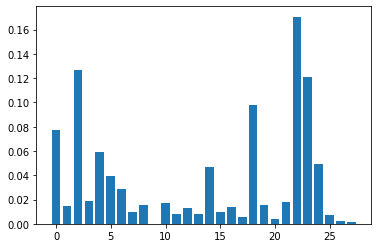

In [18]:

plt.figure()
X_bar=range(0,28)
x_bar=list(X_bar)
plt.bar(X_bar,RandomForestClassifierModel.feature_importances_)

# Calculating Prediction

In [19]:

y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 2 4 2 2 2 2 2 2 2]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.    0.536 0.464 0.    0.   ]
 [0.03  0.15  0.81  0.    0.01 ]
 [0.    0.    0.1   0.    0.9  ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.075 0.925 0.    0.   ]
 [0.    0.15  0.85  0.    0.   ]
 [0.    0.01  0.96  0.    0.03 ]
 [0.    0.    0.99  0.01  0.   ]
 [0.    0.04  0.96  0.    0.   ]]


# #Calculating Confusion Matrix

In [20]:

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[ 16   8   0   0]
 [  1 154   0   0]
 [  0   3  16   0]
 [  0   0   0   7]]


# drawing confusion matrix

<AxesSubplot:>

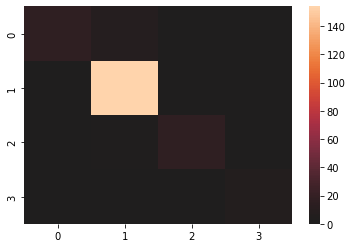

In [21]:

plt.figure()
sns.heatmap(CM, center = True)

# Calculating Confusion Matrix

In [22]:

CM = confusion_matrix(y_train,RandomForestClassifierModel.predict(X_train))
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[  6   0   0   0   0]
 [  0  44   0   0   0]
 [  0   1 316   0   0]
 [  0   0   0  28   0]
 [  0   0   0   0  20]]


#  drawing confusion matrix

<AxesSubplot:>

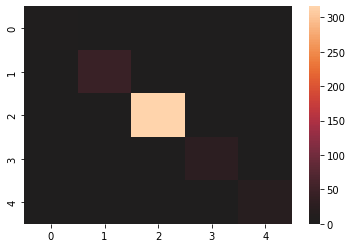

In [23]:

plt.figure()
sns.heatmap(CM, center = True)

# Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [24]:

AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9414634146341463


# Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)

In [25]:

F1Score = f1_score(y_test, y_pred, average='micro') 
print('F1 Score is : ', F1Score)

F1 Score is :  0.9414634146341464


# Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  

In [26]:

PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9414634146341463


# read test data

In [27]:

test_data=pd.read_csv('/kaggle/input/metalfurnace/Test1.csv')

# print 5 frist test data

In [28]:

print(test_data.head())

         f0        f1        f2        f3        f4       f5        f6  \
0 -0.837812 -0.273636  1.276580  0.463262 -0.585142 -0.24287  0.349804   
1  2.078087 -0.273636 -0.496119  0.463262 -2.438092 -0.24287  0.349804   
2 -0.837812 -0.273636  1.276580  0.463262 -0.585142 -0.24287  0.349804   
3 -0.837812 -0.273636 -0.496119  0.463262  1.267808 -0.24287 -2.858743   
4 -0.837812 -0.273636 -0.496119  0.463262 -0.585142 -0.24287 -2.858743   

        f7        f8       f9  ...       f18      f19      f20       f21  \
0  0.12356  0.166795  0.06143  ...  0.197642  0.06143  0.27735  0.886135   
1  0.12356  0.166795  0.06143  ... -5.059644  0.06143  0.27735  0.886135   
2  0.12356  0.166795  0.06143  ...  0.197642  0.06143  0.27735 -1.128496   
3  0.12356  0.166795  0.06143  ... -5.059644  0.06143  0.27735 -1.128496   
4  0.12356  0.166795  0.06143  ...  0.197642  0.06143  0.27735 -1.128496   

        f22       f23       f24       f25       f26       f27  
0 -0.568935  1.100428 -0.244589  0

# print test data columns

In [29]:

x=1
for col in test_data.columns:
    print(f'column {x} is : ',col)
    x+=1

column 1 is :  f0
column 2 is :  f1
column 3 is :  f2
column 4 is :  f3
column 5 is :  f4
column 6 is :  f5
column 7 is :  f6
column 8 is :  f7
column 9 is :  f8
column 10 is :  f9
column 11 is :  f10
column 12 is :  f11
column 13 is :  f12
column 14 is :  f13
column 15 is :  f14
column 16 is :  f15
column 17 is :  f16
column 18 is :  f17
column 19 is :  f18
column 20 is :  f19
column 21 is :  f20
column 22 is :  f21
column 23 is :  f22
column 24 is :  f23
column 25 is :  f24
column 26 is :  f25
column 27 is :  f26
column 28 is :  f27


# predict test_data  

In [30]:
  
submision=RandomForestClassifierModel.predict(test_data) 

# predict test_data is csv

In [31]:

submision=pd.DataFrame(submision)
submision.to_csv('submision.csv')